<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

In [2]:
from google.colab import files
uploaded = files.upload()  # listings.csv 업로드

Saving listings.csv to listings.csv


In [ ]:
# import os

# for f in os.listdir():
#     if f not in ['.config', 'sample_data']:
#         os.remove(f)

In [3]:
import os
os.listdir()

['.config', 'listings.csv', 'sample_data']

In [4]:
df = pd.read_csv("listings.csv")

In [5]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 84055
Columns: 18


In [6]:
pd.reset_option('display.max_columns')
for col in df.columns:
    print(col)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
license


In [7]:
dtypes = df.dtypes.reset_index()
dtypes.columns = ["column", "dtype"]
dtypes.head(20)

,column,dtype
0,id,int64
1,name,object
2,host_id,int64
3,host_name,object
4,neighbourhood_group,float64
5,neighbourhood,object
6,latitude,float64
7,longitude,float64
8,room_type,object
9,price,float64


In [8]:
df["neighbourhood_group"].isna().mean()
df["neighbourhood_group"].value_counts(dropna=False).head(10)

,count
neighbourhood_group,
NaN,84055


In [9]:
df["last_review"]

,last_review
0,2025-06-03
1,2025-06-05
2,2025-06-03
3,2015-09-14
4,NaN
...,...
84050,NaN
84051,NaN
84052,NaN
84053,NaN


In [10]:
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")
df["last_review"]

,last_review
0,2025-06-03
1,2025-06-05
2,2025-06-03
3,2015-09-14
4,NaT
...,...
84050,NaT
84051,NaT
84052,NaT
84053,NaT


In [11]:
dtypes["dtype"].value_counts()

,count
dtype,
int64,7
object,6
float64,5


In [12]:
missing = df.isna().mean().sort_values(ascending=False).reset_index()
missing.columns = ["column", "missing_ratio"]

missing["missing_ratio_pct"] = (missing["missing_ratio"] * 100).round(2)

missing.head(10)

,column,missing_ratio,missing_ratio_pct
0,neighbourhood_group,1.0000,100.0000
1,price,0.3580,35.8000
2,last_review,0.2327,23.2700
3,reviews_per_month,0.2327,23.2700
4,license,0.2096,20.9600
5,host_name,0.0003,0.0300
6,name,0.0000,0.0000
7,id,0.0000,0.0000
8,neighbourhood,0.0000,0.0000
9,host_id,0.0000,0.0000


In [13]:
missing[missing["missing_ratio"] == 1.0]

,column,missing_ratio,missing_ratio_pct
0,neighbourhood_group,1.0000,100.0000


In [14]:
df = df.drop(columns=["neighbourhood_group"])

In [15]:
df = df[df["price"].notna() & (df["price"] > 0)]

In [16]:
df["review_group"] = np.where(df["number_of_reviews"] == 0, "No Reviews", "Has Reviews")

In [17]:
if "reviews_per_month" in df.columns:
    df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

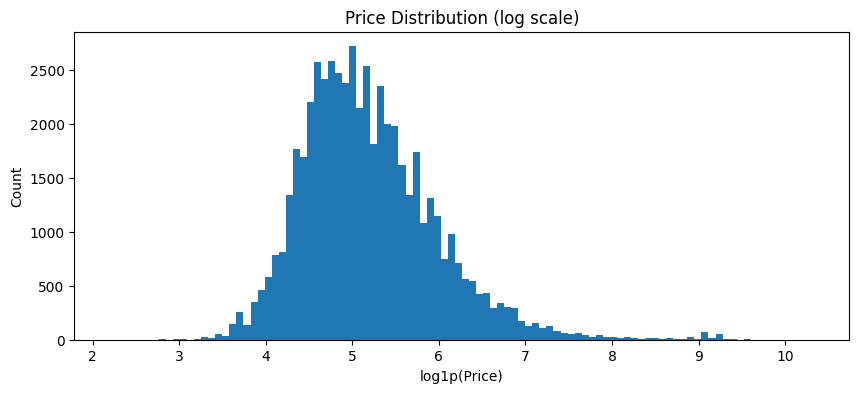

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(np.log1p(df["price"]), bins=100)
plt.xlabel("log1p(Price)")
plt.ylabel("Count")
plt.title("Price Distribution (log scale)")
plt.show()

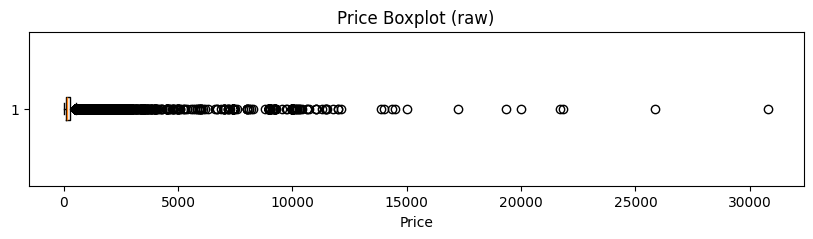

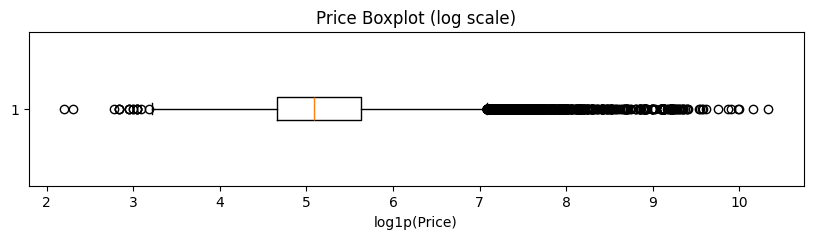

In [33]:
plt.figure(figsize=(10,2))
plt.boxplot(df["price"], vert=False)
plt.xlabel("Price")
plt.title("Price Boxplot (raw)")
plt.show()

plt.figure(figsize=(10,2))
plt.boxplot(np.log1p(df["price"]), vert=False)
plt.xlabel("log1p(Price)")
plt.title("Price Boxplot (log scale)")
plt.show()

In [34]:
display(
    df[["id", "name", "neighbourhood", "room_type", "price"]]
      .sort_values("price", ascending=False)
      .head(20)
)

,id,name,neighbourhood,room_type,price
6577,7447891,indisponible,Buttes-Chaumont,Entire home/apt,"30,814.0000"
80750,1378932244717547553,Studio charmant Moulin Rouge,Opéra,Entire home/apt,"25,875.0000"
63871,1125359543752940863,Par132 - Comfortable apartment in Ternes,Batignolles-Monceau,Entire home/apt,"21,827.0000"
72007,1197728179717957125,Par134 - Stunning apartment in St Germain des ...,Palais-Bourbon,Entire home/apt,"21,710.0000"
62633,1116659358989277992,Rue braque,Hôtel-de-Ville,Entire home/apt,"20,000.0000"
56986,1062302361300355225,Appartement Jardin Seguin CityCosy,Buttes-Montmartre,Entire home/apt,"19,360.0000"
68172,1160725601494020996,Par096 - Luxury penthouse on Avenue Montaigne,Élysée,Entire home/apt,"17,231.0000"
42860,849049656897709453,1BDR w balcon- Bail mobilité,Popincourt,Entire home/apt,"15,000.0000"
61582,1107894589115893027,Hôtel Particulier Trocadéro - Tour Eiffel Paris,Passy,Entire home/apt,"14,497.0000"
48939,947552330516421029,studio 17 m²,Reuilly,Entire home/apt,"14,336.0000"


In [31]:
p99 = df["price"].quantile(0.99)
print("p99 price:", p99)

before = df.shape[0]
after  = df[df["price"] <= p99].shape[0]

print("rows before:", before)
print("rows after  (<= p99):", after)
print("removed rows:", before - after)
print("removed ratio:", round((before - after) / before, 4))

p99 price: 1935.899999999987
rows before: 53963
rows after  (<= p99): 53423
removed rows: 540
removed ratio: 0.01


In [35]:
before_desc = df["price"].describe(
    percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]
)

after_desc = df.loc[df["price"] <= p99, "price"].describe(
    percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]
)

summary = pd.DataFrame({
    "before": before_desc,
    "after_p99": after_desc
})

display(summary)

,before,after_p99
count,"53,963.0000","53,423.0000"
mean,285.2634,231.8112
std,688.6164,221.5329
min,8.0000,8.0000
50%,161.0000,160.0000
75%,277.0000,270.0000
90%,480.0000,455.0000
95%,720.0000,650.0000
99%,"1,935.9000","1,207.7800"
max,"30,814.0000","1,934.0000"


In [37]:
missing_ratio = df.isna().mean().sort_values(ascending=False)
missing_df = pd.DataFrame({
    "missing_ratio": missing_ratio,
    "missing_ratio_pct": (missing_ratio * 100).round(2)
}).reset_index().rename(columns={"index": "column"})

display(missing_df)

,column,missing_ratio,missing_ratio_pct
0,last_review,0.2160,21.6000
1,license,0.1061,10.6100
2,host_name,0.0002,0.0200
3,id,0.0000,0.0000
4,name,0.0000,0.0000
5,host_id,0.0000,0.0000
6,longitude,0.0000,0.0000
7,room_type,0.0000,0.0000
8,neighbourhood,0.0000,0.0000
9,latitude,0.0000,0.0000


In [38]:
df.to_csv("listings_clean.csv", index=False)
print("Saved: listings_clean.csv")

Saved: listings_clean.csv


In [39]:
files.download("listings_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
from google.colab import files
uploaded = files.upload()  # neighbourhoods.geojson 업로드

Saving neighbourhoods.geojson to neighbourhoods.geojson


In [42]:
import json

with open("neighbourhoods.geojson", "r", encoding="utf-8") as f:
    geo = json.load(f)

# geojson의 neighbourhood 이름 리스트 추출
geo_neigh = []
for feat in geo["features"]:
    props = feat.get("properties", {})
    # InsideAirbnb geojson은 보통 'neighbourhood' key를 쓴다
    if "neighbourhood" in props:
        geo_neigh.append(props["neighbourhood"])
    else:
        # 혹시 다른 key일 수 있으니 properties 전체를 먼저 확인
        geo_neigh.append(list(props.values())[0] if props else None)

geo_neigh = pd.Series(geo_neigh).dropna().astype(str).unique()
print("GeoJSON neighbourhood count:", len(geo_neigh))
print("All neighbourhoods:", geo_neigh)

GeoJSON neighbourhood count: 20
All neighbourhoods: ['Batignolles-Monceau' 'Palais-Bourbon' 'Buttes-Chaumont' 'Opéra'
 'Entrepôt' 'Gobelins' 'Vaugirard' 'Reuilly' 'Louvre' 'Luxembourg'
 'Élysée' 'Temple' 'Ménilmontant' 'Panthéon' 'Passy' 'Observatoire'
 'Popincourt' 'Bourse' 'Buttes-Montmartre' 'Hôtel-de-Ville']


In [47]:
if "neighbourhood" in df.columns:
    geo_set = set(geo_neigh)
    list_set = set(df["neighbourhood"].dropna().astype(str).unique())
    inter = geo_set.intersection(list_set)
    print("Matched neighbourhoods:", len(inter))
    print("Unmatched in listings:", len(list_set - geo_set))
    print("Unmatched in geojson:", len(geo_set - list_set))

Matched neighbourhoods: 20
Unmatched in listings: 0
Unmatched in geojson: 0
